In [71]:
import pandas as pd
df = pd.read_csv("batch_results.csv")
df = df[df["Step"]% 10==0]  # only include every 10th step for analysis
#df = df[df["authority_density"].isin([0.0, 0.05, 0.15, 0.25])]
df.head()

,RunId,iteration,Step,width,height,seed,authority_density,reliability_min,reliability_max,Mean Knowledge,Mean Behavior,Net Health Belief
0,5,0,0,50,50,0,0.0,-0.5,1.0,-0.000249,0.5136,0.019852
10,5,0,10,50,50,0,0.0,-0.5,1.0,0.040911,0.5168,0.027074
20,5,0,20,50,50,0,0.0,-0.5,1.0,0.188791,0.5276,0.047261
30,5,0,30,50,50,0,0.0,-0.5,1.0,0.546631,0.5428,0.084622
40,5,0,40,50,50,0,0.0,-0.5,1.0,1.067991,0.5496,0.098084


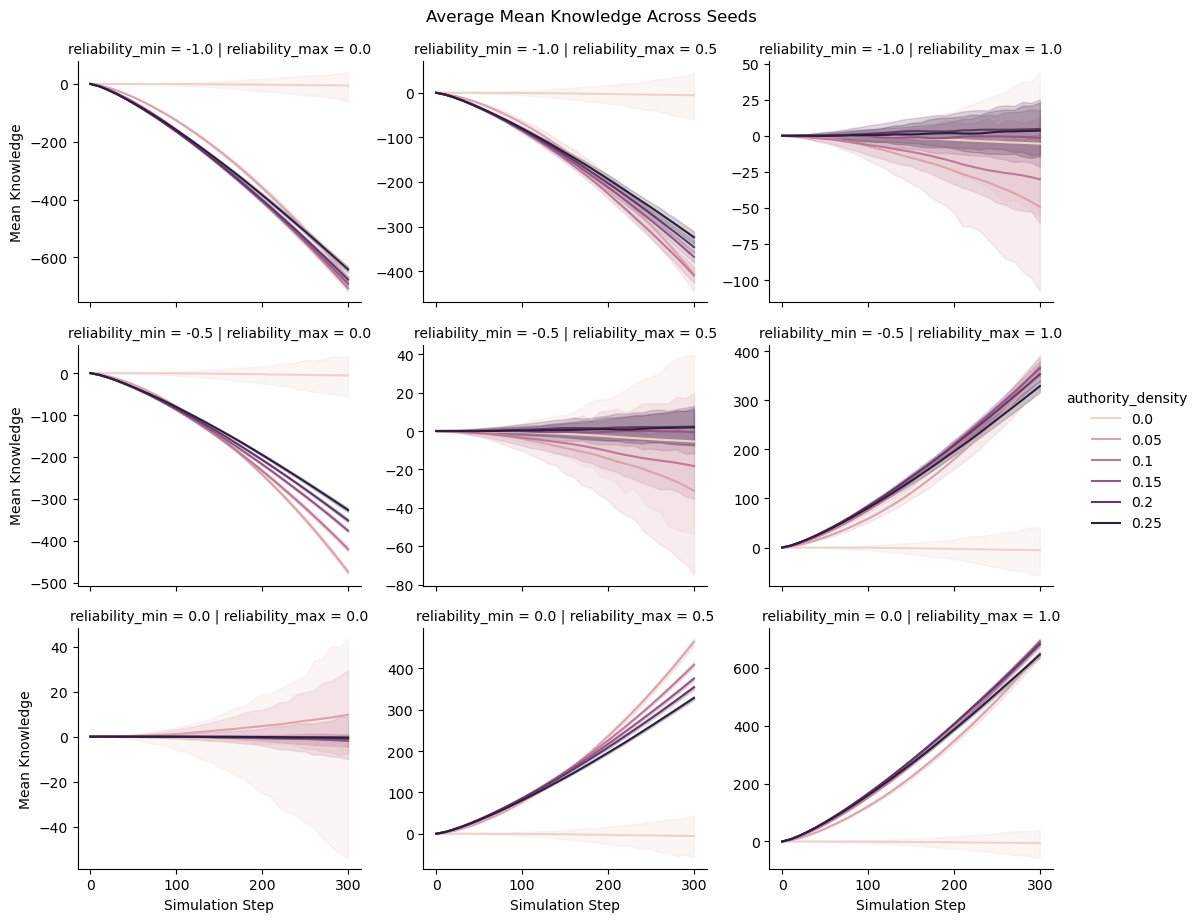

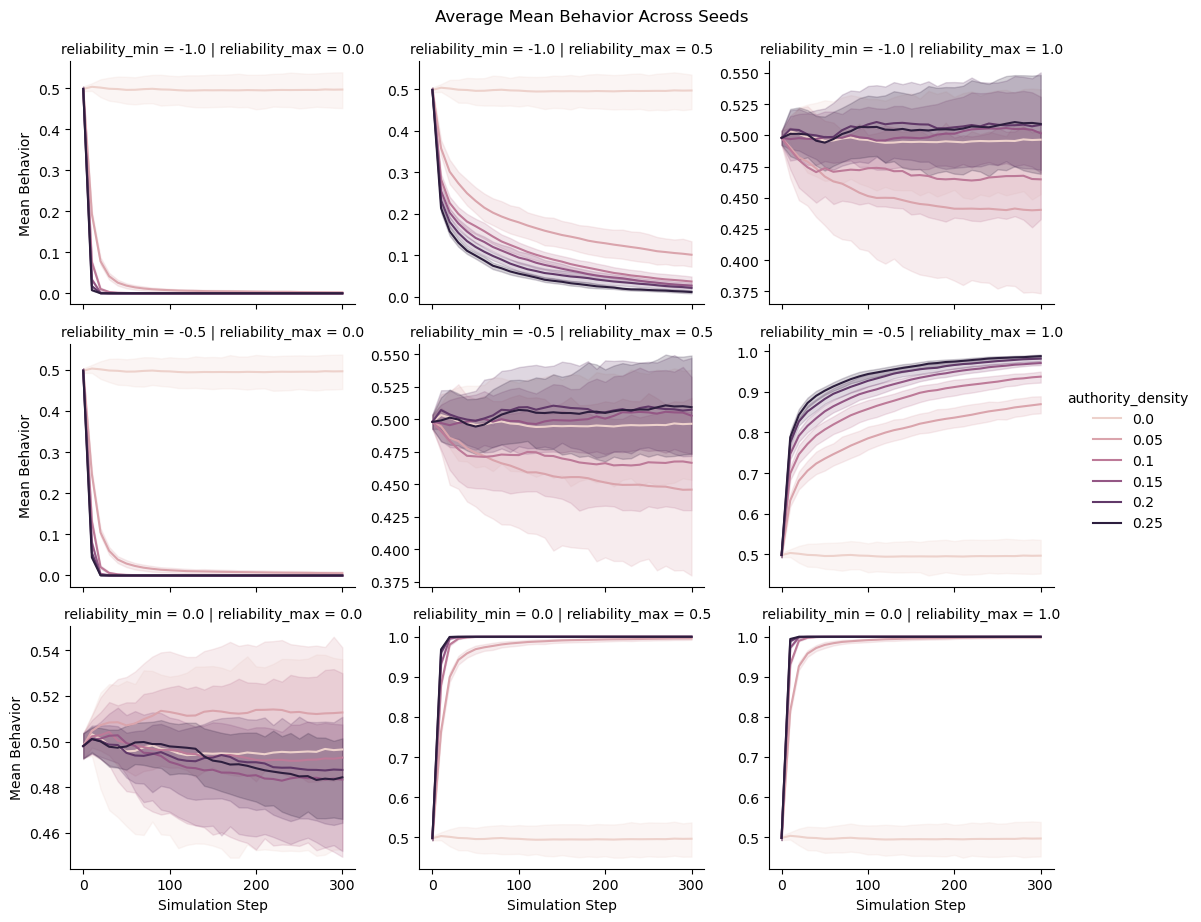

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = [
    ("Mean Knowledge", "Mean Knowledge"),
    ("Mean Behavior", "Mean Behavior"),
]

for colname, label in metrics:
    g = sns.relplot(
        data=df, # pass in original df
        x="Step", y=colname,
        kind="line",
        hue="authority_density",
        col="reliability_max", row="reliability_min",
        errorbar=("ci", 95), # automatically averages over seeds
        height=3, aspect=1.2,
        facet_kws={"sharey": False}
    )
    g.set_axis_labels("Simulation Step", label)
    g.fig.suptitle(f"Average {label} Across Seeds", y=1.02)
    plt.show()

Mean Behavior and Net Health Belief produce identical plots when averaged across the seeds, so I chose to only show the output for Mean Behavior here. You can see more variation in behavior from step to step when directly comparing the behavior and health belief plots for a single run in the GUI. For instance, see the image below (which shows the mean behavior and net health belief plots for a run with authority_density=0 and seed=0). The image demonstrates a generally similar curve for both plots, but the mean behavior plot is less smooth from step to step than the net health belief plot.
![image](/Users/haileyhansen/MACSS/40550/ABM_SP25/A2/results/MB_NHB_ex.png)